In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
import seaborn as sns

import os
import zipfile
import shutil
from glob import glob

from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, Activation, Flatten, MaxPool2D

In [ ]:
plt.style.use('seaborn')

In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
link = 'https://drive.google.com/file/d/1I-wGxEbC2Vj3_aVNWxjWoQz0ZUzRXqX6/view?usp=sharing' 

In [ ]:
id = link.split('d/')[1].split('/view?')[0]
print (id)

1I-wGxEbC2Vj3_aVNWxjWoQz0ZUzRXqX6


In [ ]:
downloaded = drive.CreateFile({'id':id})  
downloaded.GetContentFile('Dataset.zip')  

In [ ]:
file_zip = 'Dataset.zip'
zip_ref = zipfile.ZipFile(file_zip, 'r')
zip_ref.extractall('./Dataset/')
zip_ref.close()

print(os.listdir('./Dataset/'))

['Anemia', 'Non Anemia']


In [ ]:
dir = './Dataset/'
list_category = sorted(os.listdir(dir))
list_category

['Anemia', 'Non Anemia']

In [ ]:
anemia_dir = os.path.join(dir,'Anemia')
nonanemia_dir = os.path.join(dir, 'Non Anemia')


print("Anemia :", len(os.listdir(anemia_dir)))
print("Non Anemia :", len(os.listdir(nonanemia_dir))) 

Anemia : 82
Non Anemia : 101


In [ ]:
anemia = glob(anemia_dir + '/*.jpg') + glob(anemia_dir + '/*.png')
nonanemia = glob(nonanemia_dir + '/*.jpg') + glob(nonanemia_dir + '/*.png')

In [ ]:
def category_decide(x):
  value = 0
  if '/Anemia/' in x:
    value = 1
  elif '/Non Anemia/' in x:
    value = 0
  return value

df = pd.DataFrame(columns=['image', 'target'])
df['image'] = anemia + nonanemia
df['target'] = df['image'].apply(lambda x: category_decide(x))
df = df.sample(frac=1).reset_index(drop=True)

df.head()

,image,target
0,./Dataset/Non Anemia/img_2_83.jpg,0
1,./Dataset/Non Anemia/img_2_52.jpg,0
2,./Dataset/Non Anemia/img_2_100.jpg,0
3,./Dataset/Anemia/img_1_144.jpg,1
4,./Dataset/Non Anemia/img_2_51.jpg,0


In [ ]:
train_df, test_df = train_test_split(
    df, 
    test_size=0.2, 
    random_state=56, 
    stratify=df['target']
)
val_df, test_df = train_test_split(
    test_df, 
    test_size=0.15, 
    random_state=56, 
    stratify=test_df['target']
)

print("Train: {}".format(train_df.shape))
print("Anemia  : {}".format(train_df[train_df['target'] == 1].shape[0]))
print("Non Anemia: {}".format(train_df[train_df['target'] == 0].shape[0]))

print("\nVal: {}".format(val_df.shape))
print("Anemia  : {}".format(val_df[val_df['target'] == 1].shape[0]))
print("Non Anemia: {}".format(val_df[val_df['target'] == 0].shape[0]))

print("\nTest : {}".format(test_df.shape))
print("Anemia  : {}".format(test_df[test_df['target'] == 1].shape[0]))
print("Non Anemia: {}".format(test_df[test_df['target'] == 0].shape[0]))

Train: (146, 2)
Anemia  : 65
Non Anemia: 81

Val: (31, 2)
Anemia  : 14
Non Anemia: 17

Test : (6, 2)
Anemia  : 3
Non Anemia: 3


In [ ]:
train_df.head()

,image,target
14,./Dataset/Anemia/img_1_161.jpg,1
127,./Dataset/Anemia/img_1_169.jpg,1
151,./Dataset/Non Anemia/img_2_95.jpg,0
32,./Dataset/Non Anemia/img_2_26.jpg,0
38,./Dataset/Anemia/img_1_125.jpg,1


In [ ]:
val_df.head()

,image,target
58,./Dataset/Anemia/img_1_145.jpg,1
143,./Dataset/Anemia/img_1_127.jpg,1
121,./Dataset/Anemia/img_1_140.jpg,1
57,./Dataset/Anemia/img_1_156.jpg,1
99,./Dataset/Non Anemia/img_2_4.jpg,0


In [ ]:
test_df.head()

,image,target
145,./Dataset/Anemia/img_1_129.jpg,1
21,./Dataset/Non Anemia/img_2_20.jpg,0
111,./Dataset/Anemia/img_1_100.jpg,1
148,./Dataset/Non Anemia/img_2_93.jpg,0
69,./Dataset/Non Anemia/img_2_81.jpg,0


In [ ]:
print(list_category)

['Anemia', 'Non Anemia']


In [ ]:
for  item in list_category:
  class_dir = os.path.join(dir,item)
  print(item ," : ",len(os.listdir(class_dir)),"images")

Anemia  :  82 images
Non Anemia  :  101 images


In [ ]:
from PIL import Image
total = 0

for x in list_category:
  dir_cat = os.path.join(dir, x)
  y = len(os.listdir(dir_cat))
  print(x+':', y)
  total = total + y
  
  size = (0,0)
  img_name = os.listdir(dir_cat)
  for i in range(82):
    img_path = os.path.join(dir_cat, img_name[i])
    img = Image.open(img_path)
    
    if size == img.size:
      continue
    else :
      size = img.size
      print('+ size = ',img.size)

print('\nTotal :', total)

Anemia: 82
+ size =  (224, 224)
Non Anemia: 101
+ size =  (224, 224)

Total : 183


Anemia


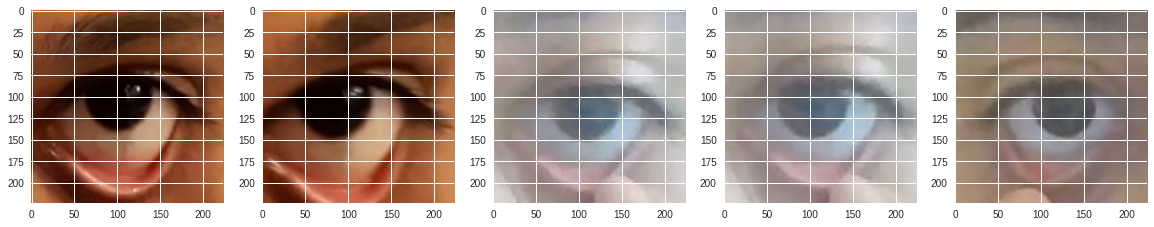

Non Anemia


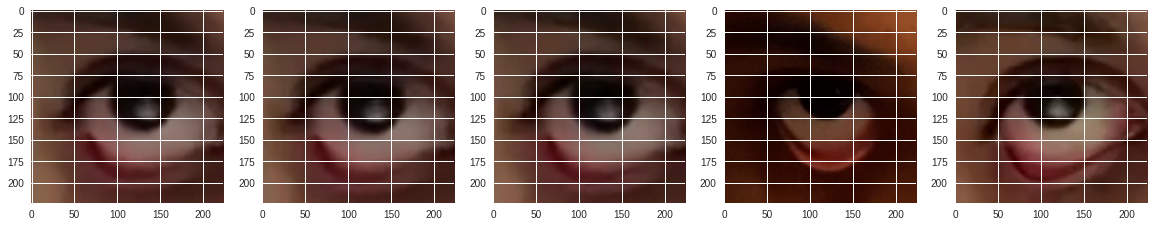

In [ ]:
for  item in list_category:
  print(item)
  class_dir = os.path.join(dir,item)
  class_images = os.listdir(class_dir)
  plt.figure(figsize=(20, 4))
  for i, img_path in enumerate(class_images[:5]):
    sp = plt.subplot(1, 5, i+1)
    img = mpimg.imread(os.path.join(class_dir, img_path))
    plt.imshow(img)
  plt.show()

In [ ]:
dim = 150

def decode_image(filename, label=None, image_size=(dim, dim)):
    bits = tf.io.read_file(filename)
    image = tf.image.decode_jpeg(bits, channels=3)
    image = tf.cast(image, tf.float32) 
    image /= 255.0  
    image = tf.image.resize(image, image_size) 
    
    if label == None:
        return image
    else:
        return image, tf.one_hot(label, depth=len(list_category))

def image_augment(image, label=None):
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_brightness(image, 0.2)
    image = tf.image.random_contrast(image, lower = 0.3, upper = 0.9)

    if label == None:
        return image
    else: 
        return image, label

In [ ]:
AUTO = tf.data.experimental.AUTOTUNE
batch_size = 8

train_dataset = (
    tf.data.Dataset
    .from_tensor_slices((train_df['image'], train_df['target']))
    .map(decode_image, num_parallel_calls=AUTO)
    .map(image_augment, num_parallel_calls=AUTO)
    .repeat()
    .shuffle(512)
    .batch(batch_size)
    .prefetch(AUTO)
)

val_dataset = (
    tf.data.Dataset
    .from_tensor_slices((val_df['image'], val_df['target']))
    .map(decode_image, num_parallel_calls=AUTO)
    .batch(batch_size)
    .cache()
    .prefetch(AUTO)
)

test_dataset = (
    tf.data.Dataset
    .from_tensor_slices((test_df['image'], test_df['target']))
    .map(decode_image, num_parallel_calls=AUTO)
    .batch(batch_size)
    .cache()
    .prefetch(AUTO)
)

In [ ]:
for img, label in train_dataset.take(1):
    print("Image shape: {}".format(img.numpy().shape))
    print("Label shape: {}".format(label.numpy().shape))

Image shape: (8, 150, 150, 3)
Label shape: (8, 2)


In [ ]:
def plot_dataset(dataset, rows, cols):
    for img, label in train_dataset.take(1):
        for i in range(rows*cols):
            ax = plt.subplot(rows, cols, i+1)
            plt.imshow(img[i].numpy())

            if list_category[np.argmax(label[i].numpy())] == 'Anemia':
                color = 'red'
            elif list_category[np.argmax(label[i].numpy())] == 'Non Anemia':
                color = 'green'

            plt.title(list_category[np.argmax(label[i].numpy())], color=color)
            plt.axis('off')
            plt.grid(False)

        plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


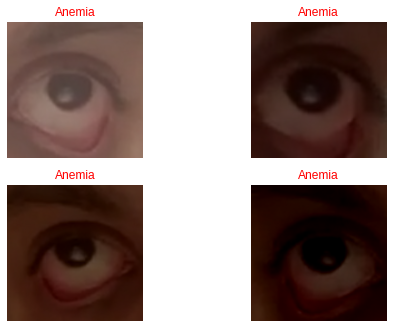

In [ ]:
plot_dataset(train_dataset, 2, 2)

In [ ]:
label_types = []
for category in list_category:
  label_types.append(category)
label_types

['Anemia', 'Non Anemia']

In [ ]:
from tensorflow.keras.applications.densenet import DenseNet121

model = tf.keras.Sequential([
    DenseNet121(
        include_top=False,
        weights='imagenet',
        input_shape=(dim, dim, 3)),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(len(list_category), activation='softmax')
])

29097984/29084464 [==============================] - 1s 0us/step


In [ ]:
do_fine_tuning = True

if do_fine_tuning:
    optimizer = tf.keras.optimizers.SGD(learning_rate=0.002, momentum=0.9)
else:
    optimizer = "adam"

model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.99 and logs.get('val_accuracy')>0.99):
      self.model.stop_training = True
      print("\nThe accuracy of the training set and the validation set has reached > 99%!")
callbacks = myCallback()

In [ ]:
history = model.fit(
    train_dataset,
    steps_per_epoch = 2,
    epochs = 100,
    validation_data = val_dataset,
    validation_steps = 2,
    verbose = 1,
    callbacks=[callbacks]
)

Epoch 1/100
2/2 [==============================] - 25s 2s/step - loss: 1.0057 - accuracy: 0.5000 - val_loss: 0.6965 - val_accuracy: 0.5000
Epoch 2/100
2/2 [==============================] - 0s 174ms/step - loss: 0.9908 - accuracy: 0.5625 - val_loss: 1.0112 - val_accuracy: 0.3750
Epoch 3/100
2/2 [==============================] - 0s 150ms/step - loss: 0.9163 - accuracy: 0.5000 - val_loss: 0.7908 - val_accuracy: 0.6875
Epoch 4/100
2/2 [==============================] - 0s 148ms/step - loss: 0.7115 - accuracy: 0.7500 - val_loss: 0.7723 - val_accuracy: 0.2500
Epoch 5/100
2/2 [==============================] - 0s 147ms/step - loss: 0.3545 - accuracy: 0.8125 - val_loss: 2.0153 - val_accuracy: 0.3125
Epoch 6/100
2/2 [==============================] - 0s 145ms/step - loss: 0.7853 - accuracy: 0.6250 - val_loss: 2.8902 - val_accuracy: 0.3125
Epoch 7/100
2/2 [==============================] - 0s 155ms/step - loss: 0.8018 - accuracy: 0.6875 - val_loss: 2.6268 - val_accuracy: 0.3125
Epoch 8/100
2/2

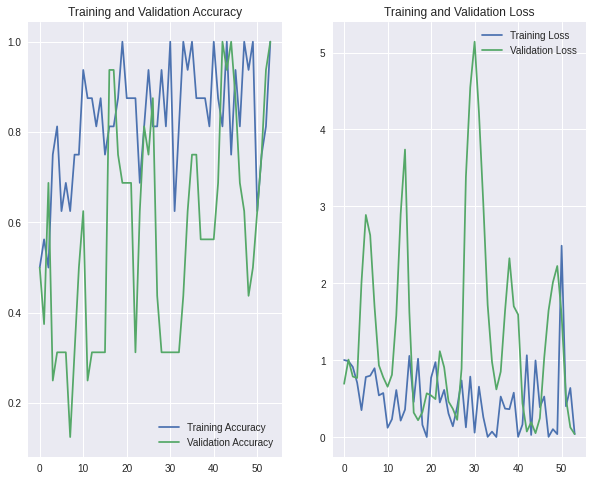

In [ ]:
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs_range   = range(len(acc)) 

plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
from google.colab import files
from tensorflow.keras.preprocessing import image
 
uploaded = files.upload()
 
for path in uploaded.keys():
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  images /= 255 
  classes = model.predict(images, batch_size)
  predicted_class_indices=np.argmax(classes)

if predicted_class_indices == 0:
    print('Non Anemia')
elif predicted_class_indices == 1:
  print('Anemia')

In [ ]:
classes

In [ ]:
saved_model_path = "./my_model.h5"

model.save(saved_model_path)

In [ ]:
import os
import keras
from keras.models import load_model
import tensorflow as tf

In [ ]:
pip install tensorflowjs

In [ ]:
import tensorflowjs as tfjs

In [ ]:
tf.compat.v1.disable_eager_execution()
model=load_model('/content/my_model.h5')

In [ ]:
!mkdir model

In [ ]:
tfjs.converters.save_keras_model(model, '/content/model')

!zip -r model.zip /content/model